In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Life Expectancy Data.csv")

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
y= df["Life expectancy "]
X=  df.drop(["Life expectancy "], axis=1)

In [10]:
y.fillna(y.median(), inplace=True)

In [11]:
X.Year = pd.to_datetime(X.Year).dt.year

## Coding categorical data

In [12]:
import sklearn
import category_encoders as ce
bin_enc = ce.BinaryEncoder(drop_invariant=True)
X = bin_enc.fit_transform(X) 

In [13]:
X.head()

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Year,Status_0,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0,0,0,0,0,0,1,1970,0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,0,0,0,0,0,0,1,1970,0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,0,0,0,0,0,0,1,1970,0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,0,0,0,0,0,0,1,1970,0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,0,0,0,0,0,0,1,1970,0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
X.fillna(X.mean(), inplace=True)

## Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=9)

## Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
sc = lr.score(X_train, y_train)
print('coefficient of determination:', sc)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination: 0.8246578016681347
intercept: 55.06661652520731
slope: [ 5.39868078e-01  3.00562333e-01  7.53268236e-01 -1.75790685e-01
 -4.00059136e-01 -1.16217061e-01  2.54676690e-01  1.92664428e-02
  1.58206781e-15  8.82491412e-01 -8.82491412e-01 -1.96947113e-02
  1.00510203e-01  9.71513717e-02 -3.83416146e-05 -1.61047720e-02
 -2.10888131e-05  4.48954665e-02 -7.46079555e-02  2.41455560e-02
  1.77176532e-02  4.56656976e-02 -4.47773693e-01  4.23917554e-05
 -5.49815561e-11 -6.89028877e-02 -3.17531192e-03  4.96058442e+00
  7.22793633e-01]


In [17]:
y_lr = lr.predict(X_test)

## SVM

In [18]:
from sklearn import svm
s = svm.SVR()
s.fit(X_train, y_train)


SVR()

In [19]:
y_svr = s.predict(X_test)

## Decision tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
y_dt = dt.predict(X_test)

## Evaluation of the quality

In [22]:
# mean squared error
from sklearn.metrics import mean_squared_error
print("Linear regression: ",mean_squared_error(y_test, y_lr))
print("SVM: ",mean_squared_error(y_test, y_svr))
print("Decision tree: ",mean_squared_error(y_test, y_dt))


Linear regression:  17.062129156285682
SVM:  100.89982155896014
Decision tree:  7.4750000000000005


In [23]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
print("Linear regression: ",mean_absolute_error(y_test, y_lr))
print("SVM: ",mean_absolute_error(y_test, y_svr))
print("Decision tree: ",mean_absolute_error(y_test, y_dt))

Linear regression:  3.0889831815712046
SVM:  7.579025871219417
Decision tree:  1.6577097505668936


## The importance of features

In [22]:
list(zip(X_train.columns.values, dt.feature_importances_))

[('Country_0', 0.003586939599600534),
 ('Country_1', 0.00043528641487956213),
 ('Country_2', 0.0012445965189790977),
 ('Country_3', 0.0002955266491424785),
 ('Country_4', 0.0007594598269913248),
 ('Country_5', 0.0004473477471656755),
 ('Country_6', 5.904270988838898e-05),
 ('Country_7', 0.0004912794219232724),
 ('Year', 0.0),
 ('Status_0', 2.2158014778123868e-05),
 ('Status_1', 0.00015274333443504666),
 ('Adult Mortality', 0.13575760786841157),
 ('infant deaths', 0.002369175986155562),
 ('Alcohol', 0.008467301710122648),
 ('percentage expenditure', 0.006271696143048364),
 ('Hepatitis B', 0.0019369721723790198),
 ('Measles ', 0.0015214550273649533),
 (' BMI ', 0.006154391731776707),
 ('under-five deaths ', 0.029396373097045313),
 ('Polio', 0.003143098419361568),
 ('Total expenditure', 0.004901823552178708),
 ('Diphtheria ', 0.003381902051066721),
 (' HIV/AIDS', 0.5912459304592244),
 ('GDP', 0.0020723185008717114),
 ('Population', 0.002860086568717561),
 (' thinness  1-19 years', 0.00654

In [23]:
sum(dt.feature_importances_)

1.0

In [24]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Sorting the values of the importance of features in descending order
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Features names
    labels = [x for x,_ in sorted_list]
    # Features importance
    data = [x for _,x in sorted_list]
    # Graph output
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Values output
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

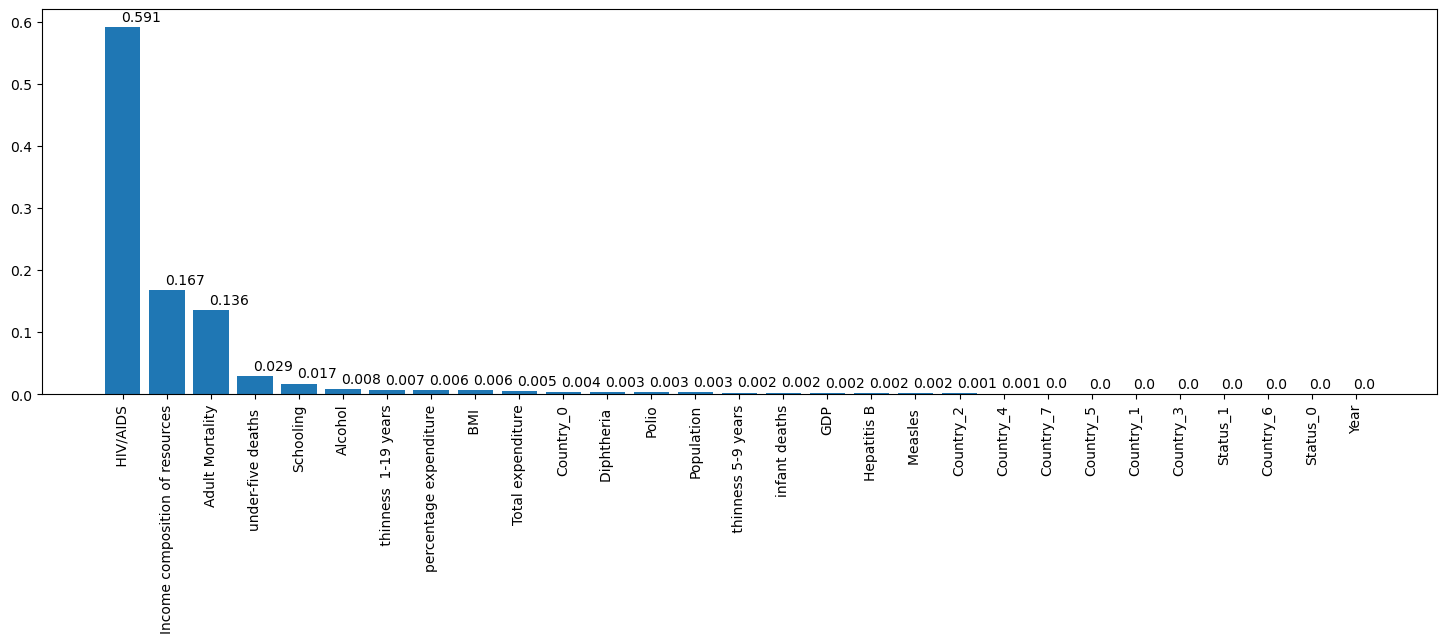

In [25]:
dt_fl, dt_fd = draw_feature_importances(dt, X_train)

## Defining hyperparameters for a tree

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}
grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

In [27]:
-grid.best_score_, grid.best_params_

(12.980019491379105,
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04})

In [28]:
dt_opt = DecisionTreeRegressor(random_state=0, max_depth=6)
dt_opt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, random_state=0)

In [33]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dt_opt, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [35]:
from sklearn import tree

[Text(0.514616935483871, 0.9285714285714286, 'X[22] <= 0.65\nsquared_error = 89.76\nsamples = 2056\nvalue = 69.288'),
 Text(0.25806451612903225, 0.7857142857142857, 'X[27] <= 0.802\nsquared_error = 34.271\nsamples = 1527\nvalue = 73.5'),
 Text(0.12903225806451613, 0.6428571428571429, 'X[11] <= 198.5\nsquared_error = 23.592\nsamples = 1144\nvalue = 71.365'),
 Text(0.06451612903225806, 0.5, 'X[27] <= 0.623\nsquared_error = 13.919\nsamples = 933\nvalue = 72.854'),
 Text(0.03225806451612903, 0.35714285714285715, 'X[13] <= 1.595\nsquared_error = 14.833\nsamples = 218\nvalue = 69.158'),
 Text(0.016129032258064516, 0.21428571428571427, 'X[17] <= 37.0\nsquared_error = 9.862\nsamples = 127\nvalue = 67.494'),
 Text(0.008064516129032258, 0.07142857142857142, 'squared_error = 5.847\nsamples = 79\nvalue = 66.108'),
 Text(0.024193548387096774, 0.07142857142857142, 'squared_error = 8.094\nsamples = 48\nvalue = 69.777'),
 Text(0.04838709677419355, 0.21428571428571427, 'X[18] <= 14.5\nsquared_error = 1

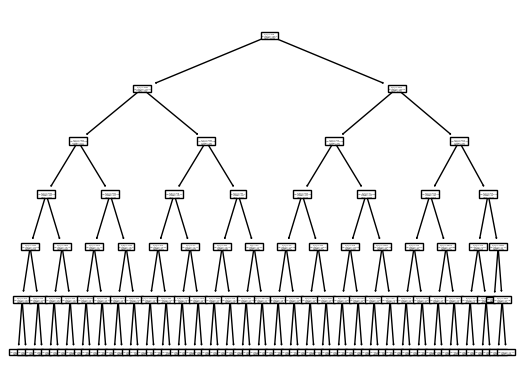

In [37]:
tree.plot_tree(dt_opt) 

[Text(0.5, 0.875, 'X[22] <= 0.65\nsquared_error = 89.76\nsamples = 2056\nvalue = 69.288'),
 Text(0.25, 0.625, 'X[27] <= 0.802\nsquared_error = 34.271\nsamples = 1527\nvalue = 73.5'),
 Text(0.125, 0.375, 'X[11] <= 198.5\nsquared_error = 23.592\nsamples = 1144\nvalue = 71.365'),
 Text(0.0625, 0.125, 'squared_error = 13.919\nsamples = 933\nvalue = 72.854'),
 Text(0.1875, 0.125, 'squared_error = 13.218\nsamples = 211\nvalue = 64.782'),
 Text(0.375, 0.375, 'X[27] <= 0.843\nsquared_error = 11.928\nsamples = 383\nvalue = 79.874'),
 Text(0.3125, 0.125, 'squared_error = 8.322\nsamples = 131\nvalue = 77.052'),
 Text(0.4375, 0.125, 'squared_error = 7.51\nsamples = 252\nvalue = 81.341'),
 Text(0.75, 0.625, 'X[11] <= 333.0\nsquared_error = 50.949\nsamples = 529\nvalue = 57.131'),
 Text(0.625, 0.375, 'X[18] <= 24.5\nsquared_error = 47.204\nsamples = 320\nvalue = 60.175'),
 Text(0.5625, 0.125, 'squared_error = 34.322\nsamples = 175\nvalue = 63.726'),
 Text(0.6875, 0.125, 'squared_error = 29.154\nsamp

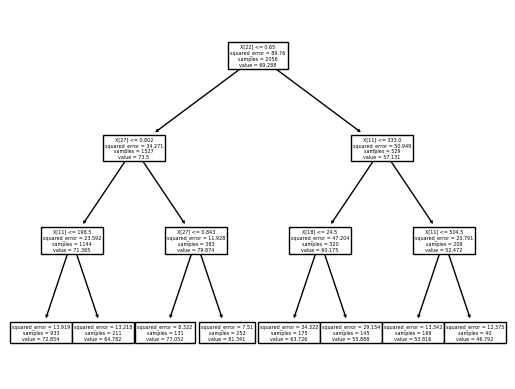

In [45]:
dt_new = DecisionTreeRegressor(random_state=0, max_depth=3)
dt_new.fit(X_train, y_train)
tree.plot_tree(dt_new) 